## Analysis of posts

Posts can be taken from https://drive.google.com/drive/folders/1F-pm_J-eKZAd7-PxnzZdCpKfAMlFs6Ke?usp=sharing

You may add a shortcut to your drive and run this code on colab OR download posts_info.csv and run locally.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
posts_info = pd.read_csv("/content/drive/My Drive/Angl/posts_info.csv")

# add year column
posts_info['Year'] = posts_info['CreatedDate'].apply(lambda x: x[:4])

posts_info.head()

,Unnamed: 0,AuthorID,OwnerID,CreatedDate,SearchQuery,AuthorType,OwnerType,Year
0,0,VK_-137472625,VK_-137472625,2020-06-16,войс,0,0,2020
1,1,VK_-110896651,VK_-110896651,2020-06-16,войс,0,0,2020
2,2,VK_-196351490,VK_-196351490,2020-06-15,войс,0,0,2020
3,3,VK_-184898993,VK_-184898993,2020-06-15,войс,0,0,2020
4,4,VK_-164251213,VK_-164251213,2020-06-15,войс,0,0,2020


### 1. Overall statistics

In [35]:
print('Number of posts:', len(posts_info))

Number of posts: 53800


In [4]:
word_counts = dict(posts_info['SearchQuery'].value_counts())
print('Number of words:', len(word_counts))

Number of words: 183


In [41]:
groups_as_authors_unique = posts_info[posts_info['AuthorType'] == 0]['AuthorID'].unique().tolist()
groups_as_authors = posts_info[posts_info['AuthorType'] == 0]['AuthorID'].tolist()

print('Number of unique groups as authors:', len(groups_as_authors_unique))
print('Number of (overall) posts of groups as authors:', len(groups_as_authors))

Number of unique groups as authors: 25946
Number of (overall) posts of groups as authors: 38588


In [43]:
groups_as_owners_unique = posts_info[posts_info['OwnerType'] == 0]['OwnerID'].unique().tolist()
groups_as_owners = posts_info[posts_info['OwnerType'] == 0]['OwnerID'].tolist()

print('Number of unique groups as owners:', len(groups_as_owners_unique))
print('Number of (overall) posts in groups:', len(groups_as_owners))

Number of unique groups as owners: 25950
Number of (overall) posts in groups: 38592


In [45]:
users_as_authors_unique = posts_info[posts_info['AuthorType'] == 1]['AuthorID'].unique().tolist()
users_as_authors = posts_info[posts_info['AuthorType'] == 1]['AuthorID'].tolist()

print('Number unique of users as authors:', len(users_as_authors_unique))
print('Number (overall) of users as authors:', len(users_as_authors))

Number unique of users as authors: 11596
Number (overall) of users as authors: 15212


### 2. Words statistics

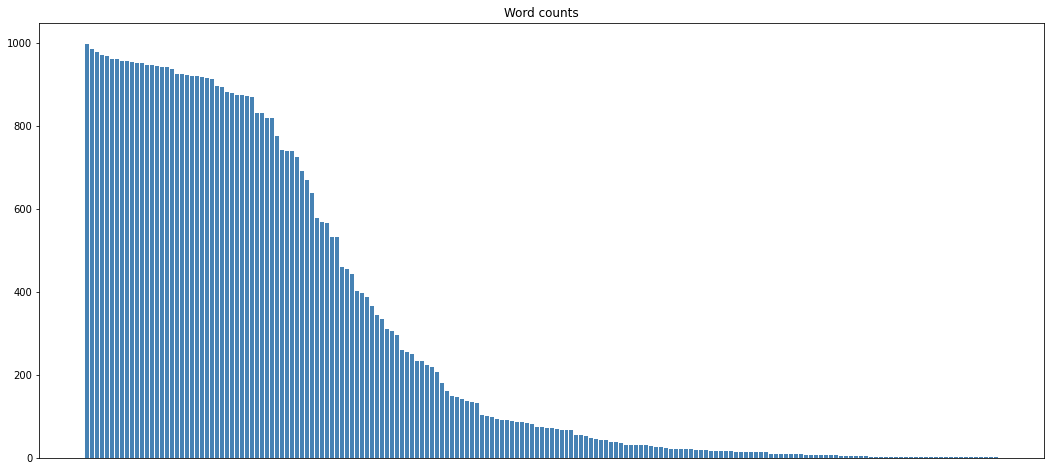

In [27]:
plt.figure(figsize=(18, 8))
plt.bar(list(word_counts.keys()), list(word_counts.values()), color='steelblue')
plt.xticks(ticks=[], labels=[])
plt.title('Word counts')
plt.show()

In [19]:
year_counts = dict(posts_info['Year'].value_counts())

sorted_year_counts = [(k, v) for k, v in sorted(year_counts.items(), key=lambda item: item[0])]

years = [year for year, _ in sorted_year_counts]
year_counts = [count for _, count in sorted_year_counts]
print('Years:', years)

Years: ['1970', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


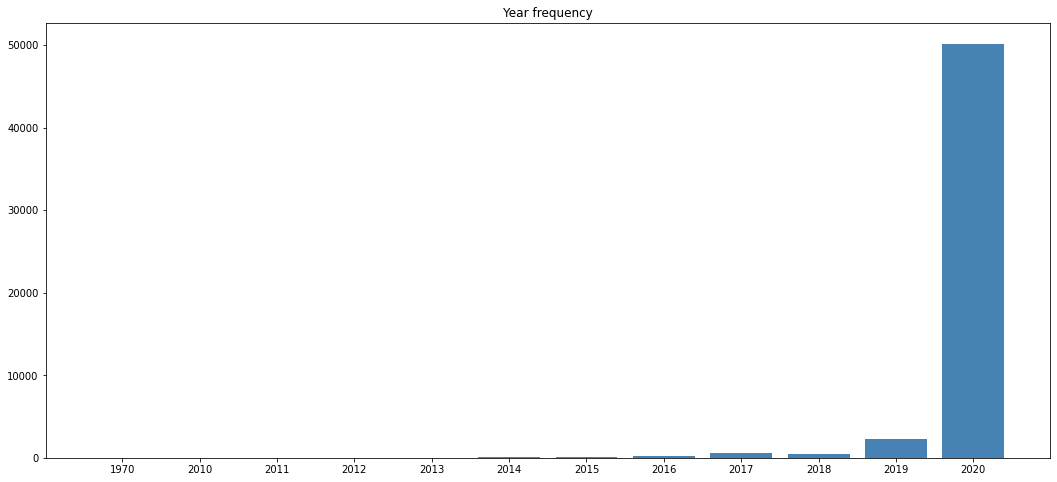

In [28]:
plt.figure(figsize=(18, 8))
plt.bar(years, year_counts, color='steelblue')
plt.title('Year frequency')
plt.show()

In [0]:
def get_month_counts(posts_info, year='2020'):
    month_counts = dict(posts_info[posts_info['Year'] == year]['CreatedDate'].apply(lambda x: x[5:7]).value_counts())

    sorted_month_counts = [(k, v) for k, v in sorted(month_counts.items(), key=lambda item: item[0])]

    months = [month for month, _ in sorted_month_counts]
    month_counts = [count for _, count in sorted_month_counts]
    
    return months, month_counts

In [23]:
months, month_counts = get_month_counts(posts_info)
print('Months of 2020:', months)

Months of 2020: ['01', '02', '03', '04', '05', '06']


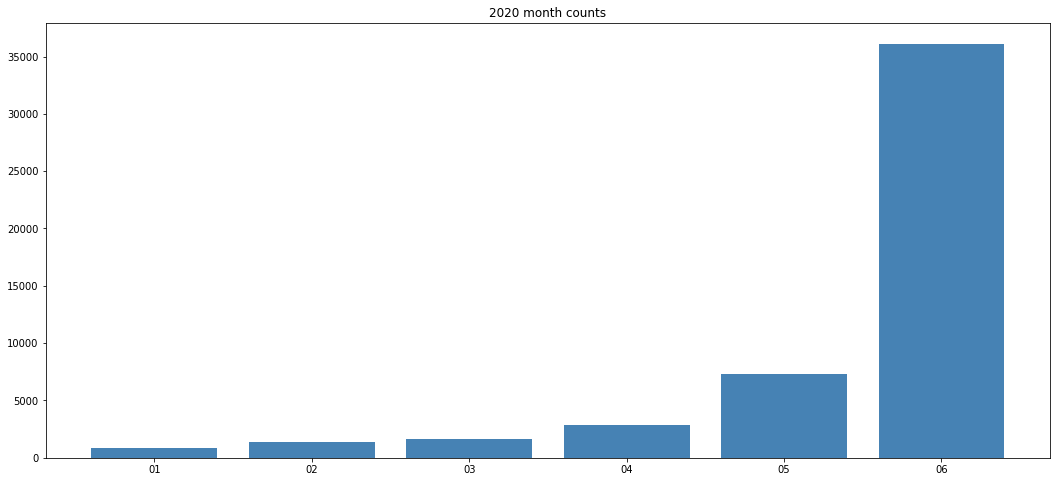

In [29]:
plt.figure(figsize=(18, 8))
plt.bar(months, month_counts, color='steelblue')
plt.title('2020 month counts')
plt.show()

### 3. Top words

In [0]:
sorted_word_counts = [(k, v) for k, v in sorted(word_counts.items(), key=lambda item: item[1])]

In [31]:
sorted_word_counts[-10:] 

[('фазер', 953),
 ('гуглить', 955),
 ('файербол', 956),
 ('брифинг', 960),
 ('вейпер', 961),
 ('импакт', 967),
 ('имиджмейкер', 971),
 ('бойлер', 977),
 ('вау', 986),
 ('гайз', 998)]

In [32]:
sorted_word_counts[:10] 

[('удриненный', 1),
 ('тайп', 1),
 ('мазифака', 1),
 ('крафтинг', 1),
 ('уэйест', 1),
 ('лакер', 1),
 ('сампецкий', 1),
 ('таггер', 1),
 ('велкам', 2),
 ('краудфандинг', 2)]

In [0]:
# popular words by years

def find_top_over_years(posts_info, years, top=10):
    top_words = {}
    for year in years: 
        word_counts = dict(posts_info[posts_info['Year'] == year]['SearchQuery'].value_counts())
        sorted_word_counts = [(k, v) for k, v in sorted(word_counts.items(), key=lambda item: item[1])]
        if len(sorted_word_counts) < top:
            top_words[year] = sorted_word_counts
        else:  
            top_words[year] = sorted_word_counts[-10:]

    return top_words

In [88]:
years = ['2020', '2019', '2018', '2017', '2016']
top_words = find_top_over_years(posts_info, years)
top_words

{'2016': [('павнер', 1),
  ('инглиш', 1),
  ('разлоить', 2),
  ('самойлайк', 3),
  ('бишур', 10),
  ('фаербрифер', 20),
  ('виндпруф', 21),
  ('импрувмент', 39),
  ('райтор', 50),
  ('хазбенд', 71)],
 '2017': [('фаербрифер', 3),
  ('разлоить', 6),
  ('павнер', 10),
  ('виндпруф', 10),
  ('бишур', 15),
  ('импрувмент', 38),
  ('райтор', 61),
  ('угуглиться', 65),
  ('хазбенд', 101),
  ('дабл-клик', 222)],
 '2018': [('разлоить', 4),
  ('павнер', 7),
  ('фаербрифер', 12),
  ('угуглиться', 16),
  ('бишур', 16),
  ('виндпруф', 20),
  ('райтор', 24),
  ('импрувмент', 46),
  ('хазбенд', 118),
  ('дабл-клик', 174)],
 '2019': [('райтор', 67),
  ('дамажить', 81),
  ('воркер', 98),
  ('хайграунд', 114),
  ('хаггер', 121),
  ('хазбенд', 128),
  ('дабл-тайм', 225),
  ('дабл-клик', 273),
  ('файербол', 359),
  ('имэйл', 507)],
 '2020': [('файна', 951),
  ('фазер', 951),
  ('гуглить', 955),
  ('вейпер', 958),
  ('брифинг', 960),
  ('импакт', 967),
  ('имиджмейкер', 970),
  ('бойлер', 977),
  ('вау', 

### 4. Top authors

In [50]:
# top users / groups in terms of word counts

author_counts = dict(posts_info.groupby('AuthorID')['SearchQuery'].nunique())
print('Number of unique authors:', len(author_counts))

Number of unique authors: 37542


In [0]:
sorted_author_counts = [(k, v) for k, v in sorted(author_counts.items(), key=lambda item: item[1])]

In [52]:
sorted_author_counts[-10:]

[('VK_354628809', 7),
 ('VK_-167200896', 8),
 ('VK_540120591', 8),
 ('VK_-152827810', 9),
 ('VK_-52079251', 9),
 ('VK_-72739547', 9),
 ('VK_-169563150', 10),
 ('VK_-189351141', 10),
 ('VK_385747517', 10),
 ('VK_396741619', 10)]

In [53]:
sorted_author_counts[:10]

[('VK_-100013213', 1),
 ('VK_-100020178', 1),
 ('VK_-100047260', 1),
 ('VK_-100071706', 1),
 ('VK_-100074881', 1),
 ('VK_-100079706', 1),
 ('VK_-100085206', 1),
 ('VK_-100089284', 1),
 ('VK_-100107404', 1),
 ('VK_-100129616', 1)]